# Банк "Метанпром". Анализ оттока клиентов.

**Описание проекта**

Нам предоставлен датасет с с содержанием данных о клиентах банка "Метанпом". Банк распологается в Ярославле и областных городах: Ростов Вликий и Рыбинск. Нам нужно проанализировать клиентов регионального банка и выделить сегменты клиентов, которые склонны уходить из банка.

**Датаст содержит данные:**
- userid — идентификатор пользователя;
- score — баллы кредитного скоринга;
- City — город;
- Gender — пол;
- Age — возраст;
- Objects — количество объектов в собственности;
- Balance — баланс на счёте;
- Products — количество продуктов, которыми пользуется клиент;
- CreditCard — есть ли кредитная карта;
- Loyalty — активный клиент;
- estimated_salary — заработная плата клиента;
- Churn — ушёл или нет.

**Инструкция выполнения проекта:**
1. Загрузка данных и изучение общей информации

     1.1. Вывод
     
2. Предобработка данных

     2.1. Измеить регистр 
     
     2.2. Проверить дубликаты
     
     2.3. Заменить на числовое обозначение в столбце city и gender 
     
     2.4. Проверить пропуски, узнать их причину и обрабтать.
     
     2.5. Вывод
     
3. Исследователльский анализ данных

     3.1. Распределение признаков
     
     3.2. Построим матрицу корреляции
     
4. Анализ оттока клиенов

     4.1. Выявить уровень оттока клиентов по признакам
     
     4.2. Вывод
     
5. Сформулируем и проверим статистические гипотезы

     5.1. Вывод
6. Выводы и предложения
     
6. Презентация

## Загрузка данных и изучение общей информации

In [41]:
#Импортируем библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score
from warnings import filterwarnings
from sklearn.preprocessing import StandardScaler
filterwarnings("ignore")
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
from scipy import stats as st
import plotly.express as px
import math
import numpy as np
from plotly import graph_objects as go
import scipy.stats as stats
import datetime as dt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.display import display
import re 
#!pip install folium
import folium

In [42]:
# Откроем файл с данными
df=pd.read_csv('/datasets/bank_dataset.csv')
df.head(10)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
7,15698884,376,Ростов Великий,Ж,29,4,115046.74,4,1,0,119346.88,1
8,15835101,501,Ярославль,М,44,4,142051.07,2,0,1,74940.50,0
9,15635125,684,Ярославль,М,27,2,134603.88,1,1,1,71725.73,0


In [43]:
#Посмотрим информацию о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


### Вывод

Нам предстоит:
- Привести к нижнему регистру названий слобцов и заменить userid на user_id и сreditсard на сredit_сard  
- Заменить на числовое обозначение в столбце city и gender, в таком виде их анализировать будет проще.
- выяснить от куда появились пропуски и как обработать пропущенные данные в столбце balance  

## Предобработка данных

### Изменим регистр 

In [44]:
df.columns = df.columns.str.lower()
df = df.rename(columns={'userid' : 'user_id', 'creditcard' : 'credit_card'})
df.head(5)

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


### Проверить дубликаты

In [45]:
df.duplicated().sum()

0

Дубликаты не выявлены

### Заменить на числовое обозначение в столбце city и gender 

In [46]:
# закодируем столбец city с помощью числовых значений Ярославль - 0, Ростов Великий - 1 и Рыбинск - 2.
map_dict = {'Ярославль' : 0, 'Ростов Великий' : 1, 'Рыбинск' : 2}
df['city'] = df['city'].map(map_dict)

# закодируем столбец gender с помощью числовых значений M - 0, Ж - 1.
map_dict = {'М' : 0, 'Ж' : 1}
df['gender'] = df['gender'].map(map_dict)

# посмотрим на результат
df.head(20)

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,0,1,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,0,1,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,2,1,43,2,125510.82,1,1,1,79084.10,0
5,15616748,645,2,0,44,8,113755.78,2,1,0,149756.71,1
6,15635267,822,0,0,50,7,NaN,2,1,1,10062.80,0
7,15698884,376,1,1,29,4,115046.74,4,1,0,119346.88,1
8,15835101,501,0,0,44,4,142051.07,2,0,1,74940.50,0
9,15635125,684,0,0,27,2,134603.88,1,1,1,71725.73,0


### Проверить пропуски, узнать их причину и обрабтать.

In [47]:
df.isna().sum()


user_id                0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             3617
products               0
credit_card            0
loyalty                0
estimated_salary       0
churn                  0
dtype: int64

In [48]:
# Проверим количество пропусков в поцентном виде
(df.isna().sum() / len(df)).round(4) * 100

user_id              0.00
score                0.00
city                 0.00
gender               0.00
age                  0.00
objects              0.00
balance             36.17
products             0.00
credit_card          0.00
loyalty              0.00
estimated_salary     0.00
churn                0.00
dtype: float64

In [49]:
df['balance'] = df['balance'].fillna('0').astype('float')
a = df.query('balance == 0')
a.groupby('city')['user_id'].count()

city
0    2418
2    1199
Name: user_id, dtype: int64

Получилось что пропущенные значени у нас в 2-х городах это Ярославль(0) - 2418, а в Рыбенске(2) - 1199 

In [50]:
#sns.barplot(x='city', y='balance', data=df);

In [51]:
#df.groupby('city')['balance'].agg('median')

Взаимосвязь balance по городам не сильно отличается

Произведем заполнение пропусков медианами. Для этого выделим медианный баланс пользователя по городу, полу, возрасту, количество продуктов, которыми пользуется клиент и ушёл или нет. Заполнение таким способом не повлияет сильно по распределению баланса и средних. 

In [52]:
medians=(df.groupby(['city','gender','age','products', 'churn'],as_index=False).agg({'balance':'median'})).rename(columns={'balance':'m_balance'})
df=df.merge(medians, on=['city','gender','age','products', 'churn'])
df.loc[df['balance'].isna(), 'balance']=df.loc[df['balance'].isna(), 'm_balance']
df=df.drop('m_balance', axis=1)

In [53]:
print('Количество пропущенных значений после заполнения:',df['balance'].isna().sum())

Количество пропущенных значений после заполнения: 0


Количество пропущенных значений осталось не так много, поэтому их можно удалить.

In [54]:
#df=df.dropna()
#print('Количество пропущенных значений после удаления:',df['balance'].isna().sum())

### Вывод

1. Мы заменили на нужный нам регистр
2. Проверили дубликаты, дубликаты отсутствуют
3. Заменить на числовое обозначение в столбце city и gender, так как нам в таком виде их анализировать будет проще.
3. Выявили пропуски и произвели заполнение их медианами. Выделили медианный баланс пользователя по городу, полу, возрасту, количество продуктов, которыми пользуется клиент и ушёл или нет клиент. Заполнение таким способом не повлияет сильно по распределению баланса и средних.

## Исследователльский анализ данных

### Распределение признаков

Построим гистограммы распределения каждой величины в разбивке по churn

In [55]:
sns.set_theme(style="whitegrid")
sns.set_palette(['#6495ed','#ed64b6'])

In [56]:
def function_hist(data,column):
    sns.displot(data,x=column,hue='churn')
    plt.title('Распределение '+name, fontsize=15)
    plt.xlabel(name)
    plt.ylabel('Распределение')
    plt.show()

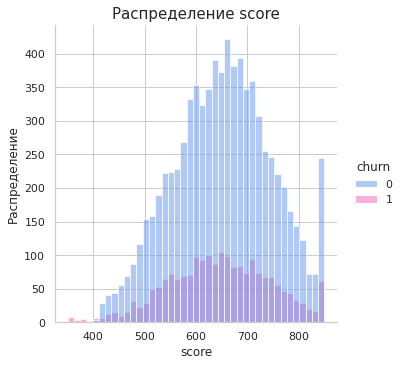

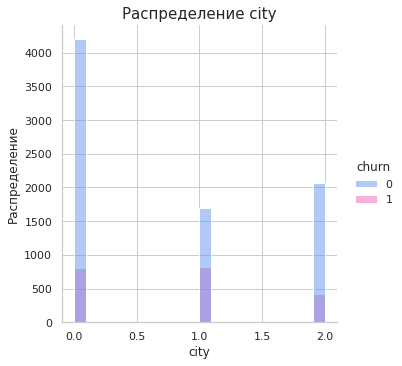

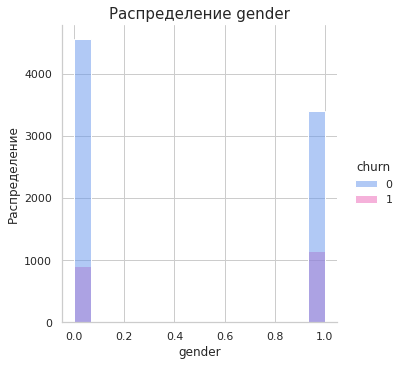

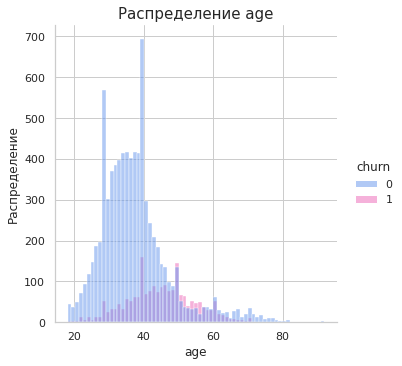

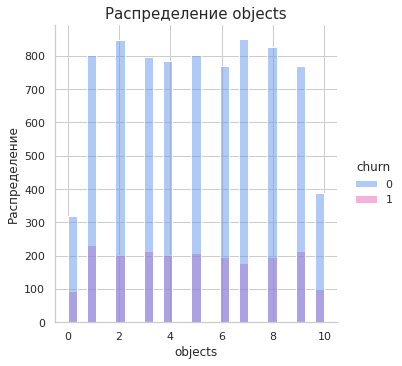

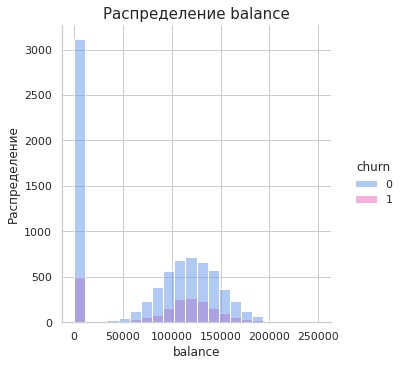

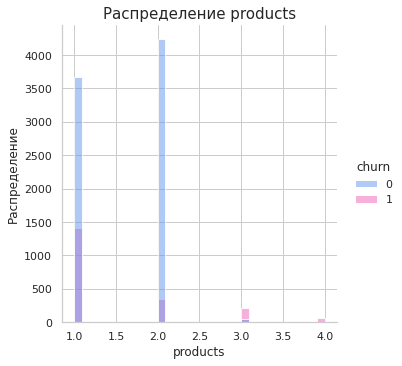

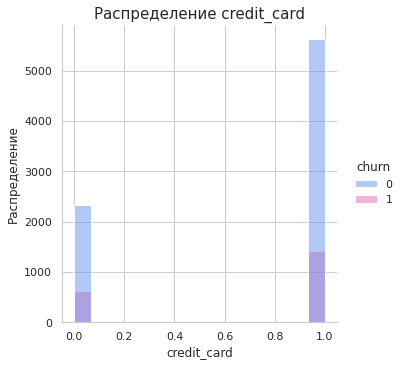

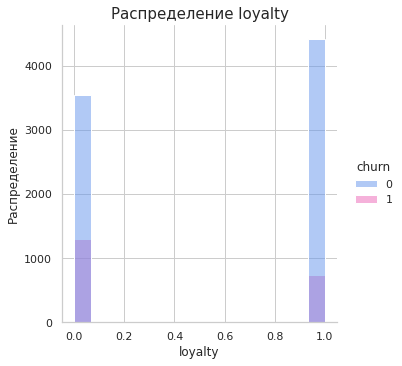

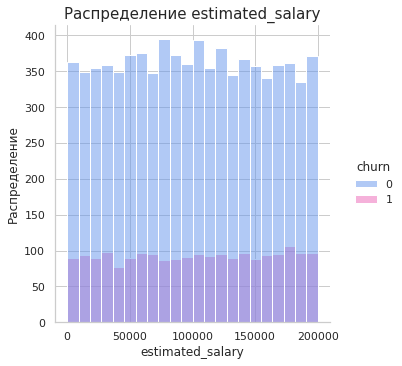

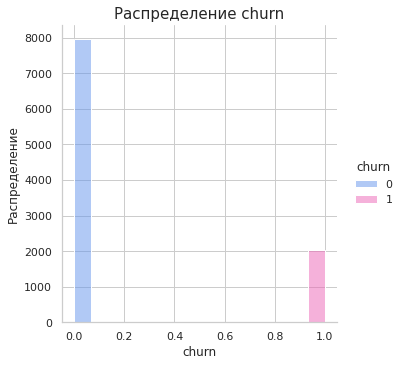

In [57]:
for name in df.columns[1::]:
    function_hist(df,name)

В столбцах score, objects, balane и  estimated_salary распределены равномерно.

В столбце city выделяется город Ростов Великий, там уходит 50% пользователей

В столбце gender мужской пол менее слонны уходить чем женский пол

В столбце age начиная с 40 лет начинается резкий спад по остшимся клиентам, а с 50 до 60 лет начинает превышать уход клиентов.

В столбце products клиенты с количество 2-х продуктов менее склонны к уходу, в отличее от клиентов с продуктами 3 и 4 только уходили.

### Построим матрицу корреляции

In [58]:
df_0 = df[df['churn'] == 0] # сделаем фильтр тех кто ещё остался
df_1 = df[df['churn'] == 1] # и тех кто уже ушёл

corr_m = df_0.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_m, cmap="YlGnBu", annot = True, fmt='.2f', linewidths=1) 
plt.title('Матрица корреляций тех кто не ушел');

corr_m = df_1.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_m, cmap="YlGnBu", annot = True, fmt='.2f', linewidths=1) 
plt.title('Матрица корреляций тех кто уже ушел');

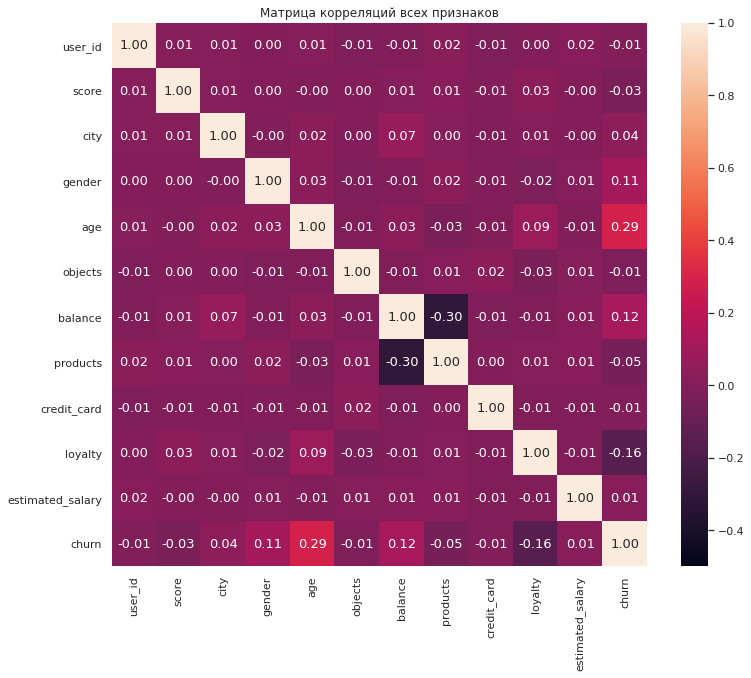

In [59]:
# построим матрицу корреляций всех признаков
cm=df.corr()
sns.set(font_scale=1)
plt.figure(figsize=(12,10))
sns.heatmap(cm,annot=True,fmt='.2f',vmin=-0.5,annot_kws={"size": 13})
plt.title('Матрица корреляций всех признаков');

Прослеживаются корреляции между возрастом и оттоком 0,31 и лояльность клиента с оттоком - 0.15.


In [60]:
df_loc_counts = df.loc[df['churn'] == 1].groupby('loyalty')[['loyalty']].count()
# переименуем столбец
df_loc_counts.columns = ['total_count']
df_loc_counts = df_loc_counts.reset_index().sort_values(by='loyalty', ascending=False)
display(df_loc_counts)

,loyalty,total_count
1,1,735
0,0,1302


In [61]:
# строим столбчатую диаграмму 
fig = px.bar(df_loc_counts.sort_values(by='total_count', ascending=True), # загружаем данные и заново их сортируем
             x='loyalty', # указываем столбец с данными для оси X
             y='total_count', # указываем столбец с данными для оси Y
             text='total_count' # добавляем аргумент, который отобразит текст с информацией
                                # о количестве объявлений внутри столбца графика
            )
# оформляем график
fig.update_layout(title='Соотношение ушедших по лояльности',
                   xaxis_title='Количество ушедших',
                   yaxis_title='Лояльность')
fig.show() # выводим график

In [62]:
df_loc_count = df.loc[df['churn'] == 1].groupby('age')[['age']].count()
# переименуем столбец
df_loc_count.columns = ['total_count']
df_loc_count = df_loc_count.reset_index().sort_values(by='age', ascending=False)
display(df_loc_count)

,age,total_count
57,84,1
56,74,1
55,73,1
54,72,1
53,71,7
52,70,4
51,69,2
50,68,6
49,67,5
48,66,7


In [63]:
# строим столбчатую диаграмму 
fig = px.bar(df_loc_count.sort_values(by='total_count', ascending=True), # загружаем данные и заново их сортируем
             x='age', # указываем столбец с данными для оси X
             y='total_count', # указываем столбец с данными для оси Y
             text='total_count' # добавляем аргумент, который отобразит текст с информацией
                                # о количестве объявлений внутри столбца графика
            )
# оформляем график
fig.update_layout(title='Соотношение ушедших по возрасту',
                   xaxis_title='количество ушедших',
                   yaxis_title='Возраст')
fig.show() # выводим график

Больше всего ушло людей с лояльностью 0 в возрасте от 40 до 52 лет.

## Анализ оттока клиенов

### Выявить уровень оттока клиентов по признакам

Обучим две модели предсказания и выделим из них лучшую. 

Проведем кодирование данных для обучения логистической регрессии и случайного леса


In [64]:
X = df.drop(columns = ['churn']) 
y = df['churn']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)


In [66]:
def train_model(m):
    print(m)
    model=m
    model.fit(X_train_st,y_train)
    y_pred=model.predict(X_test_st)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_test,y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_test,y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_test,y_pred)))

In [67]:
for mod in [LogisticRegression(), RandomForestClassifier()]:
    train_model(mod)

LogisticRegression()
	Accuracy: 0.82
	Precision: 0.62
	Recall: 0.19
RandomForestClassifier()
	Accuracy: 0.86
	Precision: 0.76
	Recall: 0.43


У случайного леса не только логика, но и метрики лучше! Логистическая регрессия ведёт себя хуже.

In [68]:
scaler=StandardScaler()
X_sc=scaler.fit_transform(df.drop(columns='churn'))

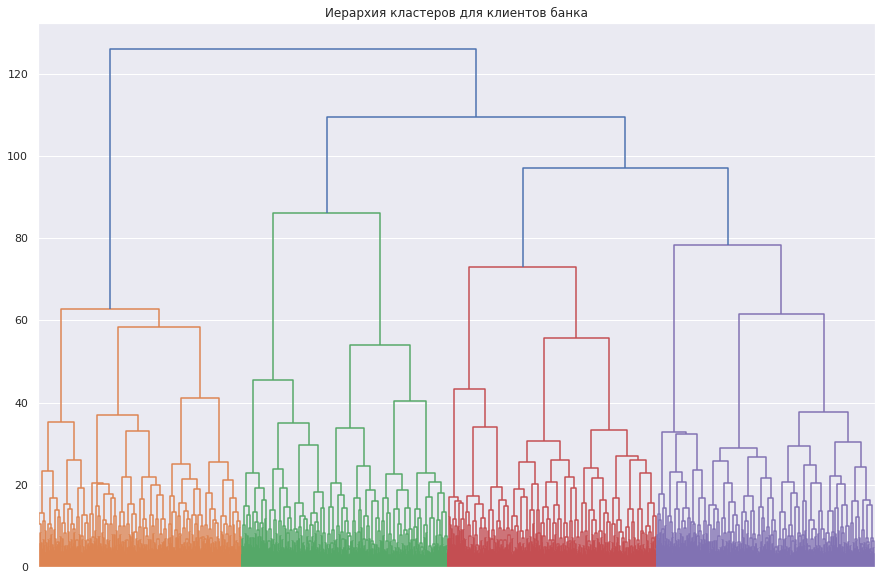

In [69]:
linked=linkage(X_sc,method='ward')
plt.figure(figsize=(15,10))
dendrogram(linked,orientation='top',no_labels=True)
plt.title('Иерархия кластеров для клиентов банка')
plt.show()

У нас получилось 3 кластера

Стандартизируем данные и построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму. На основании полученного графика предположим, какое количество кластеров можно выделить.

In [70]:
n=3
km = KMeans(n_clusters = n, init='k-means++') 
labels = km.fit_predict(X_sc) 

In [71]:
df['clusters']=labels
df.groupby(['clusters']).mean().sort_values('churn')

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
clusters,,,,,,,,,,,,
2,1.573646e+07,650.708446,0.665878,0.458446,38.688514,5.094932,10865.750905,1.863514,0.998311,0.515541,98555.888385,0.171284
0,1.573518e+07,651.385034,0.758503,0.458844,39.110204,4.914966,78053.305898,1.523129,0.000000,0.524490,100964.805626,0.206803
1,1.573059e+07,649.785122,0.795610,0.448049,38.955122,5.023659,122736.475820,1.294634,1.000000,0.508049,100570.839183,0.224878


Построим распределения признаков для кластеров.

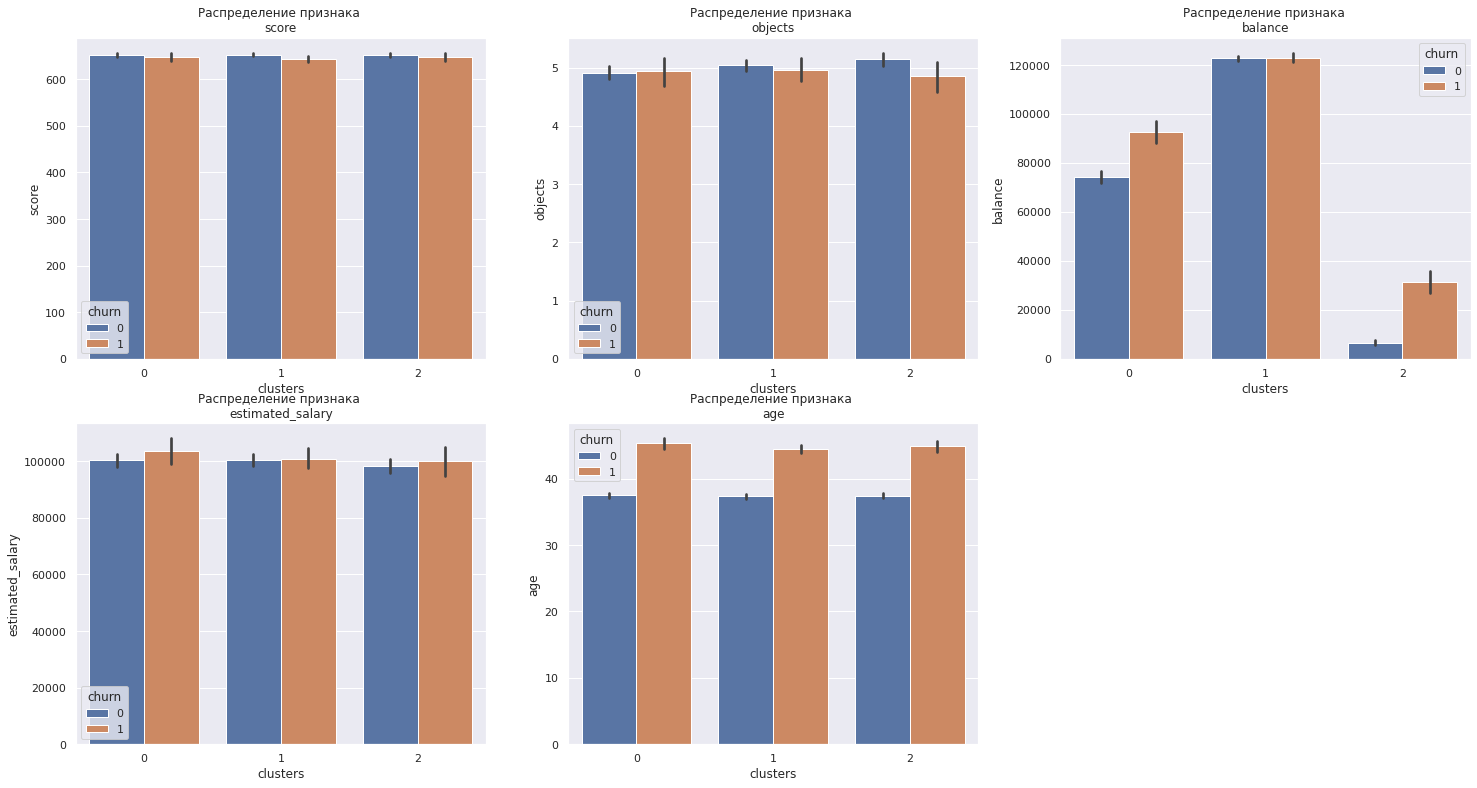

In [72]:
cols_binom = ['score', 'objects', 'balance', 'estimated_salary', 'age']

for i, col in enumerate(cols_binom):
    plt.subplot(2, 3, i+1)
    fig = plt.gcf()
    fig.set_size_inches(25,13)
    sns.barplot(data = df, x = 'clusters', y = col, hue = 'churn')
    plt.title('Распределение признака \n'+ str(col))

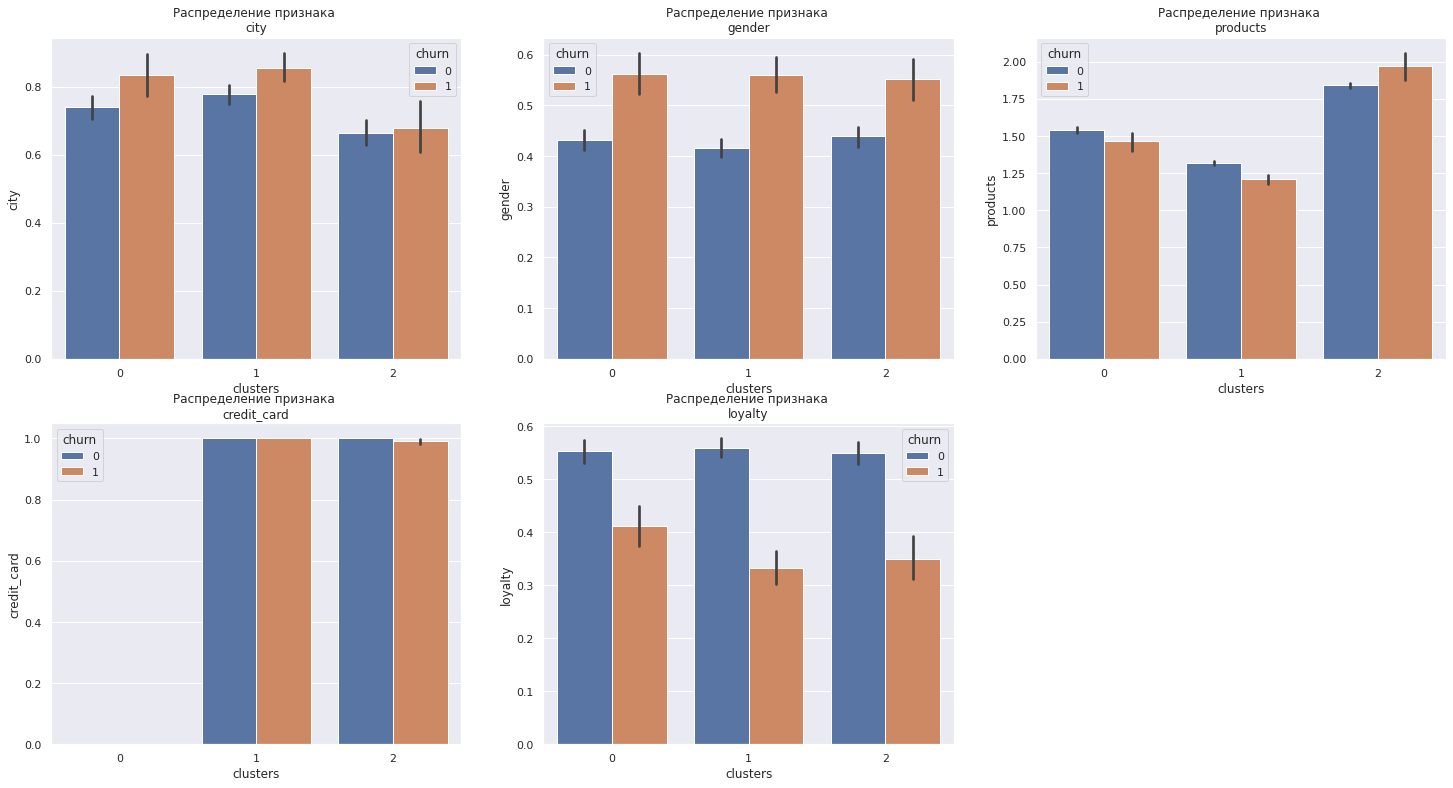

In [73]:
cols_binom = ['city', 'gender', 'products', 'credit_card', 'loyalty']

for i, col in enumerate(cols_binom):
    plt.subplot(2, 3, i+1)
    fig = plt.gcf()
    fig.set_size_inches(25,13)
    sns.barplot(data = df, x = 'clusters', y = col, hue = 'churn')
    plt.title('Распределение признака \n'+ str(col))

Посчитаем долю оттока для каждого кластера

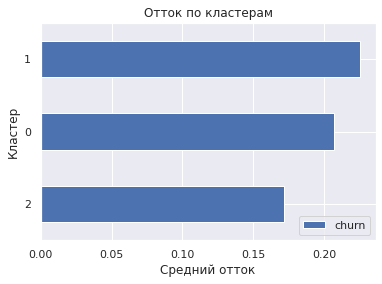

In [74]:
df.groupby(['clusters']).agg({'churn' : 'mean'}).sort_values('churn').plot(kind = 'barh')
plt.title('Отток по кластерам')
plt.xlabel('Средний отток')
plt.ylabel('Кластер');

### Вывод

Класетр 2 - ушедшие. Отсутствует какая-либо лояльность.

Кластер 0 cредний, отсутствуют кредитки. У 1 - высокая лояльность.


## Сформулируем и проверим статистические гипотезы.

Проверим данные на нормальность

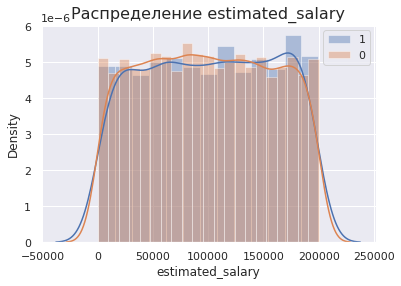

In [75]:
sns.distplot(df_1['estimated_salary'],label='1')
sns.distplot(df_0['estimated_salary'],label='0')
plt.title('Распределение estimated_salary',fontsize=16)
plt.legend()
plt.show()

Данные распределены нормально, проведем t-test.

Проверим гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.

Нулевая гипотеза- средняя выручка между оставшимися и ушедними пользователями равна

Альтернативная гипотеза - средняя выручка между оставшимися и ушедними пользователями отличается

In [76]:
alpha=0.05

print('Дисперсия ушедних:',df_1['estimated_salary'].var())
print('Дисперсия оставшихся:',df_0['estimated_salary'].var())

Дисперсия ушедних: 3353848166.807012
Дисперсия оставшихся: 3295401414.9183965


Дисперсии равны

In [77]:
results = st.ttest_ind(
    df_0['estimated_salary'], 
    df_1['estimated_salary'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.22644042802223352
Не получилось отвергнуть нулевую гипотезу


Дисперсии ушедших и оставшихся равны и средняя выручка между оставшимися и ушедними пользователями равна.

Проведем аналогичный анализ для score. Сначала проведем проверку на нормальность

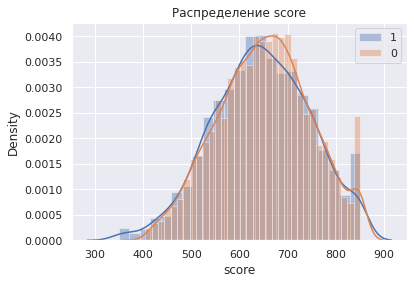

In [78]:
sns.distplot(df_1['score'],label='1')
sns.distplot(df_0['score'],label='0')
plt.title('Распределение score')
plt.legend()
plt.show()

Данные распределенными нормально.

In [79]:
alpha=0.05

print('Дисперсия ушедних:',df_1['score'].var())
print('Дисперсия оставшихся:',df_0['score'].var())

Дисперсия ушедних: 10064.403893876835
Дисперсия оставшихся: 9149.656541843884


Дисперсия отличается

Проверим гипотезу различия score между теми клиентами, которые ушли и теми, которые остались.
Нулевая гипотеза- средний счет между оставшимися и ушедними пользователями равен. Альтернативная гипотеза - средний счет между оставшимися и ушедними пользователями отличается.

In [80]:
results = st.ttest_ind(
    df_0['score'], 
    df_1['score'], equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.008464728991832862
Отвергаем нулевую гипотезу


Мы отвергли гипотезу о равестве средних score ушедших и оставшихся. Получается, уходящие пользователи становятся менее заинтересованными и их активнсть немного падает.

### Вывод

В данном блоке мы выяснили, что больше всего склонны уходить пользователи с 0 лояльностью, женского пола, из Ростова Великого, старшего возраста. Также мы заметили, что почти все пользователи с количеством покупок 3 и 4 ушли. Проверили нулевую гипотезу- средняя выручка между оставшимися и ушедними пользователями равна и не смогли ее отвергнуть


## Вывод и педложения

Произведено заполнение пропущенных данных balance по принадлежности пользователя к городу, полу и возрасту. Уменьшен регистр у названий слобцов.

Построенны гистограммы распределения величин в разбивке по churn и получены следующие результаты:
- Почти все пользователи с количеством продуктов 3 и 4 ушли. Пользователи с количеством продуктов 2 уходят реже всего
- balance и score распределен примерно одинаково
- пользователи с 0 loyalty уходят чаще
- в среднем уходят пользователи старше
- женщины уходят заметно чаще мужчин
- в Ростове Великом ушла половина пользователейг

Выявлен портрет пользователя, который уйдет с очень большой вероятностью: пользователи с 0 лояльностью, женского пола, из Ростова Великого, возраста от 40 до 52 лет.

Мы проверили проверку гипотез:
- Нулевая гипотеза- средняя выручка между оставшимися и ушедними пользователями равна
- Альтернативная гипотеза - средняя выручка между оставшимися и ушедними пользователями отличается.
- Мы не смогли отвергнуть нулевую гипотезу
- Мы отвергли гипотезу о равестве средних score ушедших и оставшихся. Получается, уходящие пользователи становятся менее заинтересованными и их активнсть немного падает

Рекомендации:

- Следует выявить по какой причине у городе Ростов Великий уходит половина клиентов, вполне возможно качество обслуживания низкое  
- Предоставить дополнительные услуги/льготы для пользователей с 3 и более продуктами
- Провести акции по удержанию пользователей старших лет и женщин.



## Презентация

https://drive.google.com/file/d/1nxRhYxT8unbSIttWK-mU2YK-QVy5_yZ4/view?usp=share_link

## Дашборд

https://public.tableau.com/views/_16722714653840/sheet1?:language=en-US&:display_count=n&:origin=viz_share_link